# **Mini-projet n°3 : Calcul des forces de pression sur une digue (Combes Robin)**

___

## <ins>Objectif :</ins>
On souhaite modéliser puis calculer numériquement la résultante des forces s'exerçant sur une digue de géométrie arbitraire destinée à retenir une étendue d'eau, de façon à pouvoir caractériser sa stabilité.

## <ins>Cadre de la modélisation :</ins>

* On considère une digue en béton de masse volumique : $µ_{\mathrm{b}}=3000\,\,\mathrm{kg}\,/\,\mathrm{m}^{3}$, posée sur un sol rocheux avec un coefficient de friction statique béton-roche : $f_{\mathrm{b,r}}=0.5$.
* On suppose que la digue retient d'un côté une masse d'eau de hauteur $\mathrm{H}=10\,\mathrm{m}\,$, l'autre côté étant exposé à l'air.
* Pour simplifier, on se placera pour l'étude statique suivante dans le plan ($\mathrm{xOy}$) comme représenté sur le schéma çi-dessous.
* Finalement, on négligera lors de l'étude les forces de pression atmosphériques dues à l'air ambiant.

![Digue.png](./Digue.png)

## <ins>Bilan des forces :</ins>

Parmi les forces extérieures s'exerçant sur la digue nous comptons donc :
* Les forces de pression hydrostatiques, avec l'expression de la norme de la pression hydrostatique en fonction de la hauteur $y$ suivante : $\mathrm{P}_{\mathrm{eau}}(\mathrm{y})=ρ_{\mathrm{eau}}\,\mathrm{g}\,(\mathrm{H}-\mathrm{y})$
* Le poids résultant de la force d'attraction gravitationnelle exercée par la Terre sur la digue
* Les forces de frottement statique entre la surface rocheuse sur laquelle est posée la digue et la digue elle même, et qui permettent à cette dernière de ne pas glisser sur la roche

L'équilibre statique de la digue $(\mathcal{D})$ est alors donné par les deux équations suivantes :
* **Théorème de la résultante statique** : $\,\,\vec{\mathrm{R}_{\mathrm{F}_{\mathrm{ext}}}}=0\,\,$, la résultante des forces extérieures s'exerçant sur la digue doit être nulle ;
* **Théorème du moment statique** : $\,\,\vec{\mathrm{m}_{\mathrm{F}_{\mathrm{ext}}}}(\mathrm{A})=0\,\,$, la résultante des moments des forces extérieures s'exerçant sur la digue et évalués en un point $\mathrm{A}\in (\mathcal{D})$ quelconque doit être nulle.

## <ins>Modélisation des pentes de la digue :</ins>

###### [ Texte issu du document explicatif du mini-projet et légèrement modifié ]

<div style='text-align:justify;'>Pour considérer une digue de géométrie arbitraire, on modélisera les pentes côté air et côté eau par des fonctions mathématiques déterminées.<br>Par ailleurs, puisque nous serons amenés à intégrer des fonctions suivant la direction donnée par l'axe vertical $\mathrm{(Oy)}$, on fait le choix dès à présent de définir les pentes de la digue à partir de fonctions mathématiques décrivant l'évolution de la variable $\mathrm{x}$ en fonction de la variable $\mathrm{y}$ (voir schéma ci-dessous).</div>

![DigueSchema.png](./DigueSchema.png)

On définit ainsi :
* une fonction croissante $f_{\mathrm{air}}$ représentant l'interface air-béton, définie pour $\mathrm{y}\in [0,\mathrm{H}]$ et à valeurs dans $[\mathrm{x_a},0]$,
* une autre fonction décroissante notée $f_{\mathrm{eau}}$ représentant l'interface eau-béton, définie sur le même intervalle et à valeurs dans $[0,\mathrm{x_e}]$. 

On ne considérera ici que des fonctions monotones.

## <ins>Cas des pentes droites :</ins>

On décide alors dans un premier temps de modéliser les pentes de la digue par des fonctions affines de la façon suivante :<br><br>$$\begin{equation}\left\{\begin{aligned}f_{\mathrm{air}} : \mathrm{y}\longmapsto -\frac{\mathrm{x_a}}{\mathrm{H}}(\mathrm{H}-\mathrm{y})\\f_{\mathrm{eau}} : \mathrm{y}\longmapsto -\frac{\mathrm{x_e}}{\mathrm{H}}(\mathrm{H}-\mathrm{y})\\\end{aligned}\right.\end{equation}$$

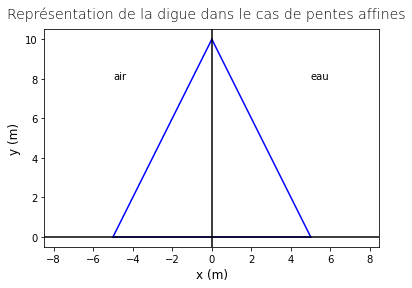

In [1]:
# Ce code permet d'afficher les courbes représentant la digue
import numpy as np
import matplotlib.pyplot as plt
H = 10
xa = -5
xe = +5


# On définit les fonctions côté eau et côté air, ici affines
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return  -(y - H) * xe / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(fair(y), y, '-b') 
plt.plot(feau(y), y, '-b')
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.suptitle("Représentation de la digue dans le cas de pentes affines", fontsize=14,fontweight='light', y=0.96)
plt.xlabel('x (m)', fontsize=12) 
plt.ylabel('y (m)', fontsize=12)
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

#### I) Calcul du volume de la digue

In [2]:
# Ce code permet de calculer le volume de la digue par intégration de la largeur de la digue en fonction de y
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *
H = 10
xa = -5
xe = +5
# On définit les fonctions côté eau et côté air
def fair(y):
    return -(y - H) * xa / H

def feau(y):
    return  -(y - H) * xe / H

# On récupère l'opposé de l'aire de la surface délimitée par fair et l'axe des abscisses
res1,err1=quad(fair,0,H)
# On récupère l'aire de la surface délimitée par feau et l'axe des abscisses
res2,err2=quad(feau,0,H) 
print("Le volume de la digue est de :",res2-res1,"m^3") #On affiche le volume

Le volume de la digue est de : 50.0 m^3


Comme attendu on obtient par l'exécution du programme çi-dessus que la digue occupe un volume de $50\,\mathrm{m}^{3}$.<br>On a en effet : $\mathrm{V}_{\mathrm{digue}}=\mathrm{A}_{\mathrm{triangle}}\times \mathrm{L}=\frac{10\,\times \,10}{2}\times 1 = 50\,\mathrm{m}^{3}$.
On peut ainsi déterminer la force de pesanteur exercée sur la digue de la façon suivante :
$$\begin{align*} 
\vec{\mathrm{P}_{\mathrm{digue}}}&= -\,µ_{\mathrm{b}}\times \mathrm{V}\times \mathrm{g}\,\,\vec{\mathrm{u_{y}}}
\\\Longrightarrow \frac{\lVert\vec{\mathrm{P}_{\mathrm{digue}}}\rVert}{\mathrm{N}}& = µ_{\mathrm{b}}\times \mathrm{V}\times \mathrm{g} \simeq 3000\times 50\times 9.81 = 1\,471\,500
\end{align*}$$

#### II) Calcul de la résultante des forces de pression côté eau

![DigueAngles.png](./DigueAngles.png)

Soit $\vec{\mathrm{F_{p}}}$ la résultante vectorielle des forces de pression s'exerçant à l'interface eau-béton, on a :
$$\begin{align*} 
&\vec{\mathrm{F_{p}}} = \iint_\mathrm{S} \vec{\mathrm{dF_{p}}} =\int_0^\mathrm{H} \mathrm{P(y)} \mathrm{dl} .\vec{\mathrm{n}}\,\,\,,\,\,\,\,\mathrm{avec}\,\,\,\vec{\mathrm{n}}=\sin(\theta).\vec{\mathrm{u_y}}-\cos(\theta).\vec{\mathrm{u_x}}
\\\\&\Longrightarrow \,\,\vec{\mathrm{F_{p}}} = \left(\int_0^\mathrm{H} \mathrm{P(y)dl}.\sin(\theta)\right).\vec{\mathrm{u_y}}\,-\left(\int_0^\mathrm{H} \mathrm{P(y)dl}.\cos(\theta)\right).\vec{\mathrm{u_x}}\,\,\,,\,\,\,\,\mathrm{avec}\,\,\,\mathrm{dl}=\frac {\mathrm{dy}}{\cos(\theta)}
\\\\ &\Longrightarrow \, \,\vec{\mathrm{F_{p}}} = \left(\int_0^\mathrm{H} \mathrm{P(y)}.\frac {\sin(\theta)}{\cos(\theta)}\, \mathrm{dy}\right).\vec{\mathrm{u_y}}\,-\left(\int_0^\mathrm{H} \mathrm{P(y)}\,\mathrm{dy}\right).\vec{\mathrm{u_x}}
\\\\& \Longrightarrow \,\,\vec{\mathrm{F_{p}}} = \left(\int_0^\mathrm{H} \mathrm{P(y)}.f'\mathrm{(y)}\,\mathrm{dy}\right).\vec{\mathrm{u_y}}\,-\left(\int_0^\mathrm{H} \mathrm{P(y)}\,\mathrm{dy}\right).\vec{\mathrm{u_x}}\,\,\,,\,\,\,\,\mathrm{car}\,\,\,\tan(\theta) = f'\mathrm{(y)}
\end{align*}$$

On peut ainsi calculer numériquement l'expression déterminée çi-dessus avec le programme suivant :

In [3]:
# Ce code permet de déterminer la résultante vectorielle des forces de pression hydrostatiques
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *
from scipy.misc import *
H = 10
xa = -5
xe = +5
# On définit la fonction côté eau ainsi que la fonction donnant la pression en fonction de y
def feau(y):
    return  -(y - H) * xe / H
    
def Peau(y):
    return  1000*9.81*(H-y)

def Produit(y):            #On définit la fonction produit de la pression avec la dérivée de feau 
    return Peau(y)*(-xe)/H

resx,errx=quad(Peau,0,H)
resy,erry=quad(Produit,0,H)
print("La résutante vectorielle des forces de pression vaut : R_p =",(-1)*round(resx,2)," u_x + ",round(resy,2)," u_y (N)") #On affiche le résultat

La résutante vectorielle des forces de pression vaut : R_p = -490500.0  u_x +  -245250.0  u_y (N)


Si l'on suppose que la digue est en équilibre statique translationnel, le théorème de la résultante statique énoncé plus haut nous donne l'équation suivante :
$$\vec{\mathrm{F_{p}}} + \vec{\mathrm{P_{digue}}} + \vec{\mathrm{R}} = \vec{0}\,\,\,,\,\,\,\,\mathrm{avec}\,\,\,\begin{equation}\left\{\begin{aligned}\vec{\mathrm{R}}=\mathrm{T}.\vec{\mathrm{u_{x}}}+\mathrm{N}.\vec{\mathrm{u_{y}}}\\ \mathrm{T<f_{b,r}}.\mathrm{N}\end{aligned}\right.\end{equation}\,\,\,\,\mathrm{la\,\,réaction\,\,du\,\,support\,\,rocheux\,\,sur\,\,lequel\,\,repose\,\,la\,\,digue}$$
On peut alors projeter cette équation selon les deux diretions $\mathrm{(Ox)}$ et $\mathrm{(Oy)}$ afin d'isoler respectivement la composante tangentielle $\mathrm{T}$ et la composante normale $\mathrm{N}$ de la réaction du support $\vec{\mathrm{R}}$, de façon à avoir :
$$\begin{equation}\left\{\begin{aligned}\mathrm{T}=-\,\vec{\mathrm{F_{p}}}\,.\,\vec{\mathrm{u_{x}}}\\ \mathrm{N}=-\,\vec{\mathrm{F_{p}}}\,.\,\vec{\mathrm{u_{y}}}+\lVert\vec{\mathrm{P_{digue}}}\rVert\\ \mathrm{T<f_{b,r}.N}\end{aligned}\right.\end{equation}\,\,\,\,\,\Longrightarrow \,\,\,\,\,\frac{\mathrm{T}}{\mathrm{N}}\,=\,\frac{-\,\vec{\mathrm{F_{p}}}\,.\,\vec{\mathrm{u_{x}}}}{\lVert\vec{\mathrm{P_{digue}}}\rVert\,-\,\vec{\mathrm{F_{p}}}\,.\,\vec{\mathrm{u_{y}}}}\,<\,\,\mathrm{f_{b,r}}$$
L'enjeu va alors être de constater si cette dernière condition est vérifiée dans différents contextes de manière à pouvoir statuer sur la stabilité ou la non-stabilité de la digue.

#### $\underline{1^{er}\mathrm{cas :}}\,\,\,\,\,\,\mathrm{x_{a}=-5\,\,et\,\,x_{e}=+5}$ 

In [4]:
# Ce code permet de définir la fonction retournant le rapport T/N en fonction du contexte considéré (i.e. en fonction des valeurs de xe et xa)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *
from scipy.misc import *
H = 10
def res1(xa,xe):
    xa=xa
    xe=xe
    def feau(y):
        return  -(y - H) * xe / H
    def fair(y):
        return -(y - H) * xa / H
    def Peau(y):
        return  1000*9.8*(H-y)
    def Produit(y):
        return Peau(y)*(-xe)/H
    v1,err=quad(feau,0,H)
    v2,err=quad(fair,0,H)
    resx,errx=quad(Peau,0,H)
    resy,erry=quad(Produit,0,H)
    T=round(resx,2)
    N=(-1)*round(resy)+3000*(v1-v2)*9.8
    return T/N

print("On obtient : T/N = {}".format(res1(-5,5)))

On obtient : T/N = 0.2857142857142857


On constate alors que la digue est bien en équilibre translationnel dans ce cas.

#### $\underline{2^{e}\mathrm{cas :}}\,\,\,\,\,\,\mathrm{x_{a}=-5\,\,et\,\,x_{e}=0}$ 

In [5]:
print("On obtient : T/N = {}".format(res1(-5,0)))

On obtient : T/N = 0.6666666666666666


#### $\underline{3^{e}\mathrm{cas :}}\,\,\,\,\,\,\mathrm{x_{a}=0\,\,et\,\,x_{e}=5}$ 

In [6]:
print("On obtient : T/N = {}".format(res1(0,5)))

On obtient : T/N = 0.5


<div style='text-align:justify;'> On remarque alors que dans le 2$^e$ cas la digue n'est manifestement pas en équilibre translationnel là où dans le 3$^e$ cas elle est à la limite de l'équilibre translationnel (cela dépend des valeurs considérées pour la constante gravitationnelle, la masse volumique du béton etc...).<br><br>Ceci s'explique par le fait que dans le 2$^e$ cas les forces de pression hydrostatique se répartissent sur une surface contenue dans le plan $\mathrm{(yOz)}$ de sorte que leur résultante ne comporte plus de composante selon la direction $\mathrm{(Oy)}$. Dès lors, la composante normale de la réaction du sol rocheux doit uniquement contrebalancer le poids de la digue qui a par ailleurs diminué de moitié (puisqu'on a "coupé" la digue en deux). Tout ceci résulte ainsi en un rapport $\,\,\mathrm{\frac{T}{N}}\,\,$trop grand pour pouvoir asssurer la stabilité de la digue.</div>

## <ins>Cas de la pente convexe :</ins>

On décide désormais de modéliser la pente de la digue à l'interface eau-béton par un une fonction polynomiale du second degré comme suit :
$$f_{\mathrm{eau}} : \mathrm{y}\longmapsto \mathrm{a\left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right)+x_e\,\,\,\,\,\,\,\,avec\,\,a\,\,un\,\,paramètre\,\,réel}$$
On prendra pour la suite $\mathrm{a=3}$.

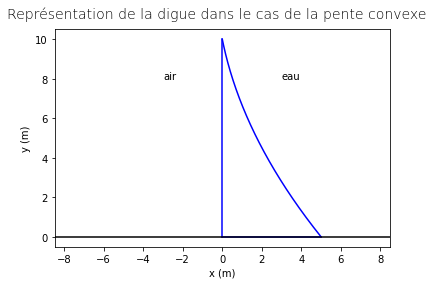

In [7]:
# Ce code permet d'afficher les courbes représentant la digue
import numpy as np
import matplotlib.pyplot as plt
H = 10
xa = 0
xe = 5

# On définit les fonctions côté eau et côté air
a = 3
def feau(y):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe
def fair(y):
    return (H - y) * xa / H

# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(feau(y), y, '-b')
plt.plot(fair(y), y, '-b')
plt.plot([xe, xa], [0, 0], '-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3, 8, 'eau')
plt.text(-3, 8, 'air')
plt.suptitle("Représentation de la digue dans le cas de la pente convexe", fontsize=14,fontweight='light', y=0.96)
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
#plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

#### $\underline{1^{er}\mathrm{cas :}}\,\,\,\,\,\,\mathrm{x_{a}=0\,\,et\,\,x_{e}=5}$ 

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *
from scipy.misc import *
H = 10
xa = 0

# On définit les fonctions côté eau et côté air, ici les courbes concaves
a = 3
def res2(xe):
    xe=xe
    def feau(y):
        return a * (y / H) ** 2 - (a + xe) * (y / H) + xe
    def dfeau(y):
        return ((2*a*y)/(H**2))-((a+xe)/H)
    def Peau(y):
        return  1000*9.81*(H-y)
    def Produit(y):
        return Peau(y)*dfeau(y)
    V,err=quad(feau,0,H)
    resx,errx=quad(Peau,0,H)
    resy,erry=quad(Produit,0,H)
    T=round(resx,2)
    N=(-1)*round(resy)+3000*V*9.81
    return (T/N,V)

print("On obtient : T/N = {}".format(res2(5)[0]))

On obtient : T/N = 0.5555555555555556


On constate alors que dans ce cas la digue n'est manifestement pas en équilibre translationnel.

#### $\underline{2^{e}\mathrm{cas :}}\,\,\,\,\,\,\mathrm{x_{a}=0\,\,et\,\,x_{e}=6}$ 

In [9]:
print("On obtient : T/N = {}".format(res2(6)[0]))

On obtient : T/N = 0.45454545454545453


Cette fois çi la digue apparaît bien comme étant en équilibre translationnel avec une situation plus stable que dans le cas de pentes affines où $\,\mathrm{x_{a}=0\,\,et\,\,x_{e}=5}$.

Sur la base de ce constat, nous allons ainsi représenter graphiquement l'évolution de la valeur du rapport $\mathrm{\frac{T}{N}}$ en fonction de la valeur du volume de la digue pour des valeurs du paramètre $\mathrm{x_{e}}$ parcourant l'intervalle $[5,6]$, via le programme çi-dessous.

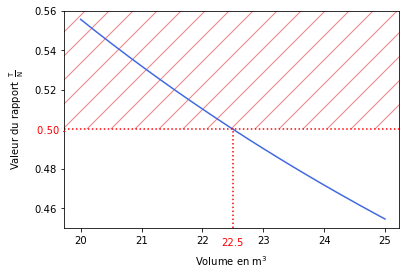

In [10]:
import numpy as np
import matplotlib.pyplot as plt
X=[]
Y=[]
for i in np.linspace(5,6,1000):
    X.append(res2(i)[1])
    Y.append(res2(i)[0])

plt.plot(X,Y,color='royalblue')
plt.axhline(y=0.5, color='red', linestyle='dotted')
plt.axvline(x=X[np.argmax(np.array(Y)<=0.5)],ymax=0.46, color='red',linestyle='dotted')
plt.barh(0.53,5.5, height=0.06, left=19.725, color='none', edgecolor='lightcoral', linestyle='none', hatch='/')
plt.xlim(19.725,25.225)
plt.ylim(0.45,0.56)
plt.yticks([0.46,0.48,0.52,0.54,0.56],["0.46","0.48","0.52","0.54","0.56"])
plt.figtext(0.062,0.4529,"0.50 -",color='red')
plt.figtext(0.49,0.066,str(round(X[np.argmax(np.array(Y)<=0.5)],2)),color='red')
plt.xlabel("Volume en m$^{3}$", labelpad=9)
plt.ylabel(r"Valeur du rapport $\,\mathrm{\frac{T}{N}}$", labelpad=9)
plt.show()

On constate alors que le volume minimal de la digue tel que l'on puisse conserver un rapport $\mathrm{\frac{T}{N}}$ inférieur à la valeur du coefficient de frottement statique $f_{\mathrm{b,r}}=0.5$, tourne aux alentours de $\mathrm{22.5\,m^{3}}$.<br>Ainsi la forme courbe de l'interface eau-béton permet de conserver l'équilibre translationnel de la digue tout en diminuant la quantité de béton nécessaire à la constitution de celle-çi puisque dans le cas de pentes affines le volume de la digue avec $\mathrm{x_{a}}=0$ était de $\mathrm{25\,m^{3}}$.

## <ins>Parenthèse</ins>

###### [ Texte issu du document explicatif du mini-projet ]

Nous avons ici omis la deuxième équation d'équilibre statique : le théorème du moment cinétique (ou équilibre du moment des forces dans le cas statique).

Pour vérifier que la digue ne bascule pas sous la pression de l'eau, il faudrait en effet vérifier que le moment des forces qui s'applique à la digue soit nul.

Pour cela, il faudrait :

- trouver le point d'application du poids (le centre de gravité de la digue),
- calculer le moment du poids par rapport à un point,
- calculer la résultante du moment des forces de pression par rapport au même point,
- trouver le point d'application de la réaction du sol qui annule la somme des moments des forces (par rapport à un point quelconque) 
- vérifier que ce point d'application est bien situé quelque part entre la digue et le sol (sinon la digue bascule...)